<a href="https://colab.research.google.com/github/garfield-gray/Soft-Computing/blob/main/MNSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
import scipy as sp

# Simple Implementation

## Rastrigin

In [ ]:
ObjF_S1 = lambda x: np.power(x[:,0]+5,2) + np.power(x[:,1]+5,2) -10*np.cos(2*np.pi*x[:,0]) -10*np.cos(2*np.pi*x[:,1]) + 20

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S1           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.07250809669494629


In [ ]:
xb

[array([-5.92446614, -3.12869082]),
 array([-3.94540907, -5.99077859]),
 array([-3.94540907, -5.99077859]),
 array([-5.0068698, -4.965482 ]),
 array([-5.0068698, -4.965482 ]),
 array([-5.0068698, -4.965482 ]),
 array([-5.0068698, -4.965482 ]),
 array([-5.0068698, -4.965482 ]),
 array([-5.0068698, -4.965482 ]),
 array([-4.99153132, -5.01658755]),
 array([-4.99153132, -5.01658755]),
 array([-4.99153132, -5.01658755]),
 array([-4.99153132, -5.01658755]),
 array([-4.98738468, -4.99432079]),
 array([-4.98738468, -4.99432079]),
 array([-5.00765401, -5.0013426 ]),
 array([-5.00260051, -5.00334031]),
 array([-5.00022922, -5.00042651]),
 array([-5.00022922, -5.00042651]),
 array([-4.99984498, -5.00012664]),
 array([-4.99999664, -4.99995538]),
 array([-4.99999355, -5.00002668]),
 array([-5.00000581, -5.00000182]),
 array([-4.99999855, -4.99999924]),
 array([-4.99999945, -4.99999921]),
 array([-5.00000023, -4.99999995]),
 array([-5.00000023, -4.99999995]),
 array([-5.00000005, -4.99999994]),
 arr

## Bukin Function

In [ ]:
ObjF_S2 = lambda x: 100*np.power(np.abs(x[:,1]-0.01*np.power(x[:,0], 2)),0.5)+0.01*np.abs(x[:,0]+10)

In [ ]:
ObjF_S2(np.array([[-10,1]]))

array([0.])

In [ ]:

t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 60                # Maximum Number of iterations
OBJ_F = ObjF_S2           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.08850336074829102


In [ ]:
xb

[array([6.6572074 , 0.42557673]),
 array([-10.        ,   1.00716391]),
 array([6.87492517, 0.47882791]),
 array([6.87492517, 0.47882791]),
 array([6.87492517, 0.47882791]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-8.40287089,  0.70655067]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   1.00025534]),
 array([-10.        ,   

In [ ]:
# it sometimes workes:)

## Rosenbrock

In [ ]:
ObjF_S3 = lambda x: 100*np.power(x[:,1]-np.power(x[:,0], 2), 2) + np.power((1-x[:,0]), 2)

In [ ]:
ObjF_S3(np.array([[1,1]]))

array([0])

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S3           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.04772186279296875


In [ ]:
xb

[array([-0.79378727,  0.54280528]),
 array([-0.79378727,  0.54280528]),
 array([0.33495516, 0.20482676]),
 array([0.59691297, 0.3386395 ]),
 array([0.82666181, 0.67886927]),
 array([0.92396466, 0.83983548]),
 array([0.92552922, 0.86044537]),
 array([0.96974531, 0.94416315]),
 array([0.98875458, 0.97651175]),
 array([0.99841642, 0.99711268]),
 array([1.00157857, 1.00326426]),
 array([0.99925572, 0.99853098]),
 array([1.00010835, 1.0002194 ]),
 array([1.00005139, 1.00010757]),
 array([1.00000571, 1.00000661]),
 array([1.00000057, 1.00000182]),
 array([0.99999836, 0.99999622]),
 array([0.99999797, 0.99999597]),
 array([0.99999967, 0.99999934]),
 array([0.99999986, 0.99999975]),
 array([0.99999991, 0.99999983]),
 array([1.        , 0.99999999]),
 array([0.99999999, 0.99999999]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([1., 1.])

## Beale

In [ ]:
ObjF_S4 = lambda x: np.power(1.5-x[:,0]+x[:,0]*x[:,1], 2) + np.power(2.25-x[:,0]+x[:,0]*np.power(x[:,1], 2), 2) + np.power(2.625-x[:,0]+x[:,0]*np.power(x[:,1], 3), 2)

In [ ]:
ObjF_S4(np.array([[3, 0.5]]))

array([0.])

In [ ]:
# MNSV_S1_1.m

import numpy as np
import matplotlib.pyplot as plt


t1 = time.time()
# Define MNSV Parameters
N = 2                     # Number of variables
NS = 10                    # Number of samples
MAXIT = 40                # Maximum Number of iterations
OBJ_F = ObjF_S4           # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables
Best = []
xb = []

# Initialization
NP = NS * (NS + 3) // 2
# R1 = np.tile(R[0, :], (NP, 1))
# R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))
f = OBJ_F(x)                   #evaluation
for it in range(MAXIT):
  ind = np.argsort(f)
  x = x[ind[:NS]]                                         # choosing the best points
  a = np.power(0.3, (it/MAXIT))
  z = a*np.cov(x.T)
  for i in range(NS):
    x = np.append(x, np.random.multivariate_normal(x[i], z, (NS-i)), axis=0)  # appending new points
  x = np.minimum(np.maximum(x, R[:,0]), R[:,1])     # making sure we're in right bounderies
  f = OBJ_F(x)                     #evaluation
  xb.append(x[np.argmin(f)])  #save the best
  Best.append(np.min(f))
  #plot
t2 = time.time()
print(t2-t1)

0.04153919219970703


In [ ]:
xb

[array([2.27326047, 0.07873359]),
 array([4.41642796, 0.68922369]),
 array([3.930467  , 0.68542768]),
 array([3.930467  , 0.68542768]),
 array([3.33333395, 0.58663699]),
 array([3.10558731, 0.53737679]),
 array([3.01893184, 0.50513672]),
 array([2.98223053, 0.49600368]),
 array([3.00667812, 0.50225427]),
 array([2.99975171, 0.49991532]),
 array([2.99975171, 0.49991532]),
 array([2.99983867, 0.49996958]),
 array([2.99996252, 0.49999024]),
 array([3.00002337, 0.50000615]),
 array([2.99999094, 0.49999788]),
 array([3.00000552, 0.50000121]),
 array([3.00000044, 0.50000014]),
 array([2.99999966, 0.49999992]),
 array([3.00000008, 0.50000001]),
 array([3.00000002, 0.50000001]),
 array([3.00000002, 0.5       ]),
 array([3.00000001, 0.5       ]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. , 0.5]),
 array([3. ,

# New Ideas

In [2]:
import matplotlib.pyplot as plt


## DB scan

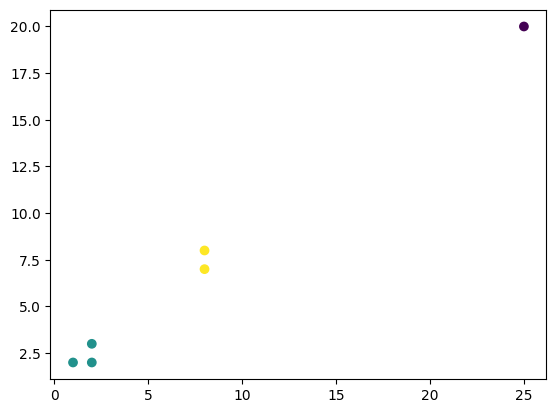

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 20]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_
# clustering
plt.scatter(X[:,0], X[:,1], c = clustering.labels_)
plt.show()

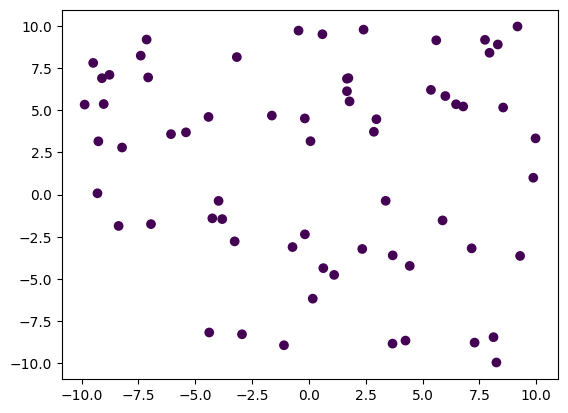

In [37]:
NS = 10
NP = NS * (NS + 3) // 2
R = np.array([[-10, 10], [-10, 10]])
X = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))


clustering = DBSCAN(eps=5, min_samples=2).fit(X)
clustering.labels_
# clustering
plt.scatter(X[:,0], X[:,1], c = clustering.labels_)
plt.show()

## hierarchy

### simple

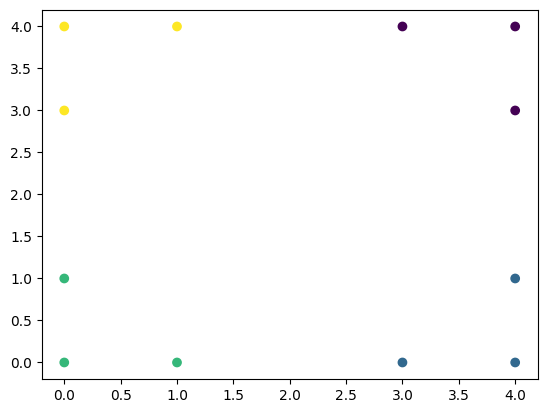

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0],
              [0, 4], [0, 3], [1, 4],
              [4, 0], [3, 0], [4, 1],
              [4, 4], [3, 4], [4, 3]])
clustering = sp.cluster.hierarchy.fclusterdata(X, t=1)
# plot
plt.scatter(X[:,0], X[:,1], c = clustering)
plt.show()

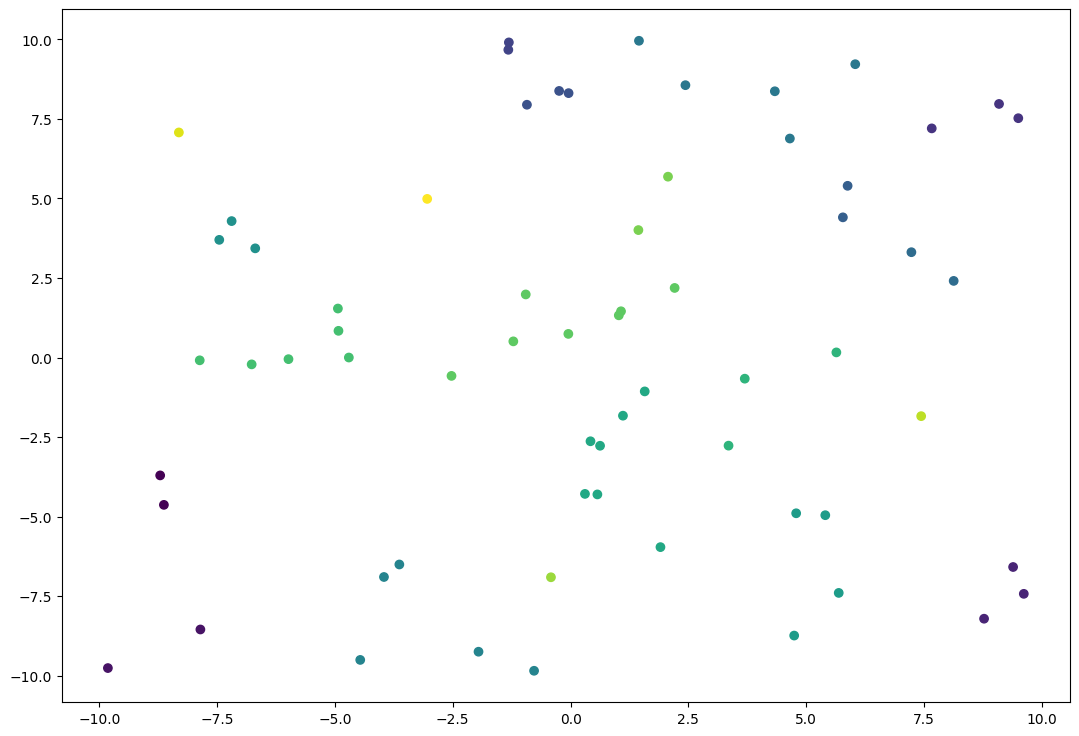

In [19]:
NS = 10
NP = NS * (NS + 3) // 2
R = np.array([[-10, 10], [-10, 10]])
X = np.random.uniform(R[0, 0], R[0, 1], (NP, 2))

clustering = sp.cluster.hierarchy.fclusterdata(X, t=1)
# plot
plt_1 = plt.figure(figsize=(13, 9))
plt.scatter(X[:,0], X[:,1], c = clustering)
plt.show()

### Advances

In [23]:
X = [[0, 0], [0, 1], [1, 0],
     [0, 4], [0, 3], [1, 4],
     [4, 0], [3, 0], [4, 1],
     [4, 4], [3, 4], [4, 3]]
y = sp.spatial.distance.pdist(X)
y.shape

(66,)

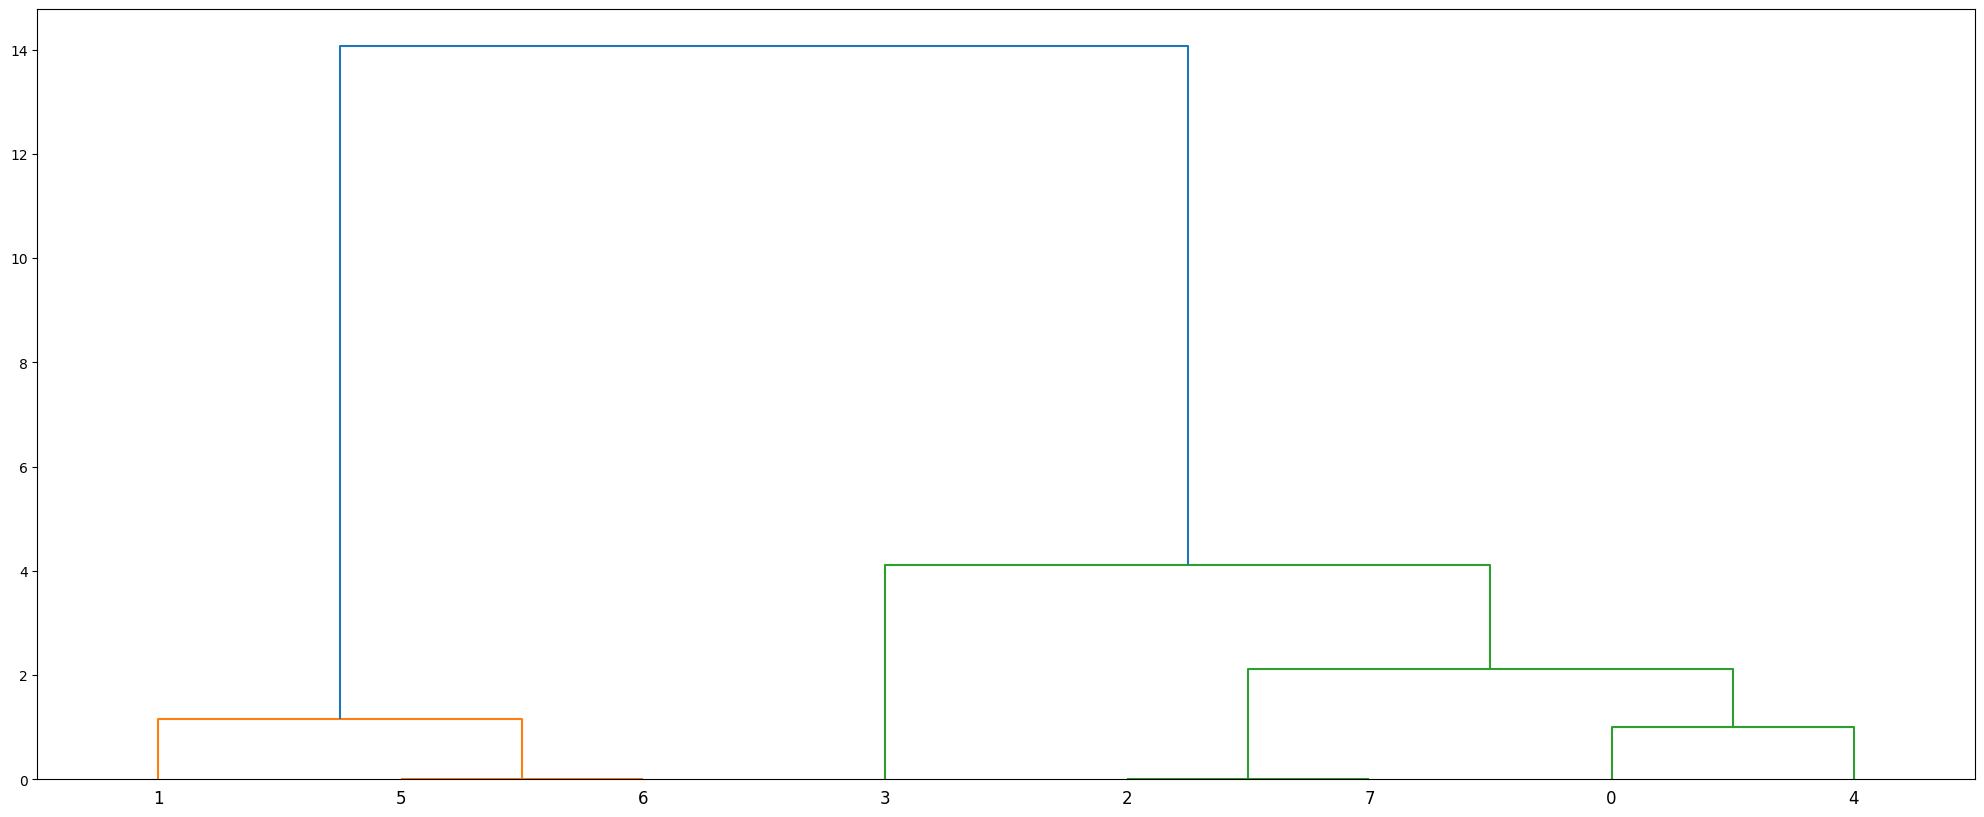

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [25]:
Z

array([[ 5.        ,  6.        ,  0.        ,  2.        ],
       [ 2.        ,  7.        ,  0.        ,  2.        ],
       [ 0.        ,  4.        ,  1.        ,  2.        ],
       [ 1.        ,  8.        ,  1.15470054,  3.        ],
       [ 9.        , 10.        ,  2.12132034,  4.        ],
       [ 3.        , 12.        ,  4.11096096,  5.        ],
       [11.        , 13.        , 14.07183949,  8.        ]])

In [26]:
from scipy.cluster.hierarchy import single, fcluster, linkage
from scipy.spatial.distance import pdist

In [33]:
X = [[0, 0], [0, 1], [1, 0],
     [0, 4], [0, 3], [1, 4],
     [4, 0], [3, 0], [4, 1],
     [4, 4], [3, 4], [4, 3],]
y = pdist(X)
Z = linkage(y, 'ward')
Z

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 3.        ,  4.        ,  1.        ,  2.        ],
       [ 6.        ,  7.        ,  1.        ,  2.        ],
       [ 9.        , 10.        ,  1.        ,  2.        ],
       [ 2.        , 12.        ,  1.29099445,  3.        ],
       [ 5.        , 13.        ,  1.29099445,  3.        ],
       [ 8.        , 14.        ,  1.29099445,  3.        ],
       [11.        , 15.        ,  1.29099445,  3.        ],
       [16.        , 17.        ,  5.77350269,  6.        ],
       [18.        , 19.        ,  5.77350269,  6.        ],
       [20.        , 21.        ,  8.16496581, 12.        ]])

## something else

# Useless

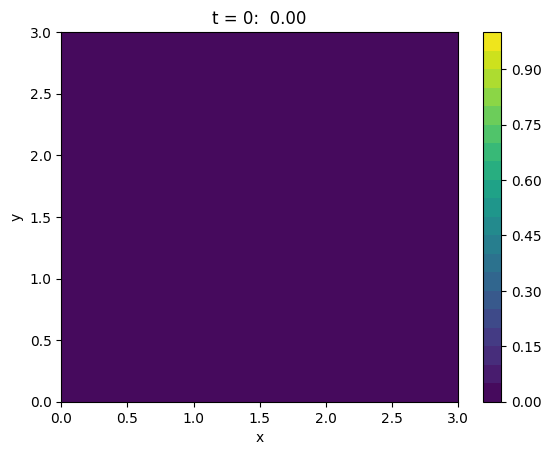

In [ ]:
import pylab as plt
import numpy
import matplotlib.animation as animation
#plt.rcParams['animation.ffmpeg_path'] = r"C:\some_path\ffmpeg.exe"   # if necessary

# Generate data for plotting
Lx = Ly = 3
Nx = Ny = 11
Nt = 20
x = numpy.linspace(0, Lx, Nx)
y = numpy.linspace(0, Ly, Ny)
x,y = numpy.meshgrid(x,y)
z0 = numpy.exp(-(x-Lx/2)**2-(y-Ly/2)**2)   # 2 dimensional Gaussian

def some_data(i):   # function returns a 2D data array
    return z0 * (i/Nt)

fig = plt.figure()
ax = plt.axes(xlim=(0, Lx), ylim=(0, Ly), xlabel='x', ylabel='y')

cvals = numpy.linspace(0,1,Nt+1)      # set contour values
cont = plt.contourf(x, y, some_data(0), cvals)    # first image on screen
plt.colorbar()

# animation function
def animate(i):
    global cont
    z = some_data(i)
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x, y, z, cvals)
    plt.title('t = %i:  %.2f' % (i,z[5,5]))
    return cont

anim = animation.FuncAnimation(fig, animate, frames=Nt, repeat=False)
anim.save('animation.mp4', writer=animation.FFMpegWriter())

In [ ]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:
import plotly.graph_objects as go

import numpy as np


# Generate curve data
t = np.linspace(-1, 1, 100)
x = t + t ** 2
y = t - t ** 2
xm = np.min(x) - 1.5
xM = np.max(x) + 1.5
ym = np.min(y) - 1.5
yM = np.max(y) + 1.5
N = 50
s = np.linspace(-1, 1, N)
xx = s + s ** 2
yy = s - s ** 2
vx = 1 + 2 * s
vy = 1 - 2 * s  # v=(vx, vy) is the velocity
speed = np.sqrt(vx ** 2 + vy ** 2)
ux = vx / speed  # (ux, uy) unit tangent vector, (-uy, ux) unit normal vector
uy = vy / speed

xend = xx + ux  # end coordinates for the unit tangent vector at (xx, yy)
yend = yy + uy

xnoe = xx - uy  # end coordinates for the unit normal vector at (xx,yy)
ynoe = yy + ux


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x, y=y,
                     name="frame",
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x, y=y,
                     name="curve",
                     mode="lines",
                     line=dict(width=2, color="blue"))
          ],
    layout=go.Layout(width=600, height=600,
                     xaxis=dict(range=[xm, xM], autorange=False, zeroline=False),
                     yaxis=dict(range=[ym, yM], autorange=False, zeroline=False),
                     title="Moving Frenet Frame Along a Planar Curve",
                     hovermode="closest",
                     updatemenus=[dict(type="buttons",
                                       buttons=[dict(label="Play",
                                                     method="animate",
                                                     args=[None])])]),

    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k], xend[k], None, xx[k], xnoe[k]],
            y=[yy[k], yend[k], None, yy[k], ynoe[k]],
            mode="lines",
            line=dict(color="red", width=2))
        ]) for k in range(N)]
)

fig.show()

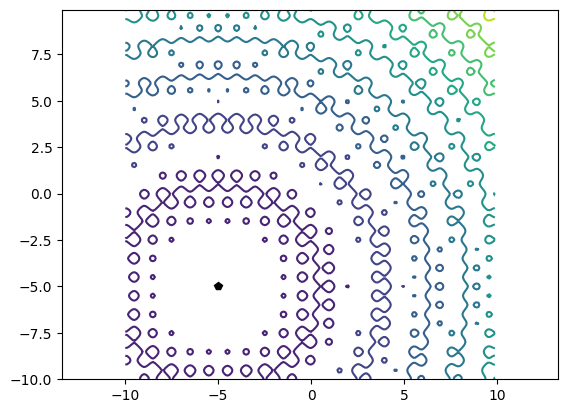

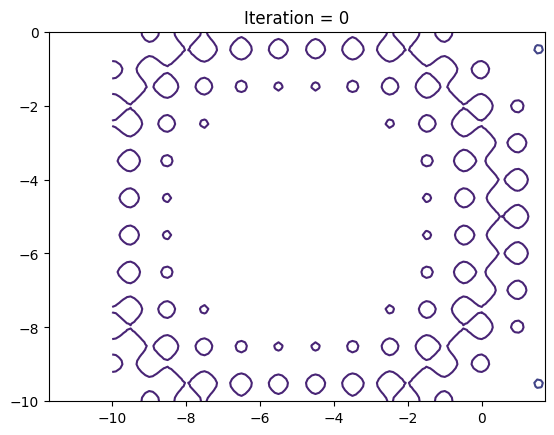

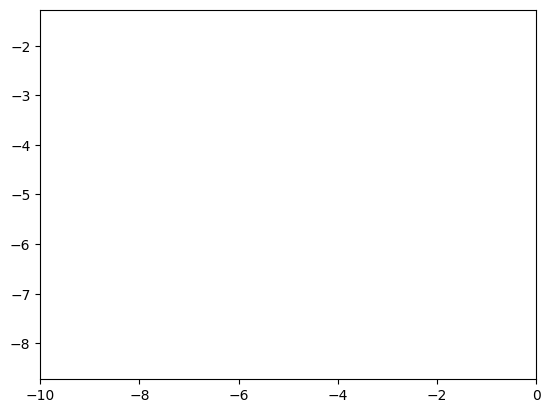

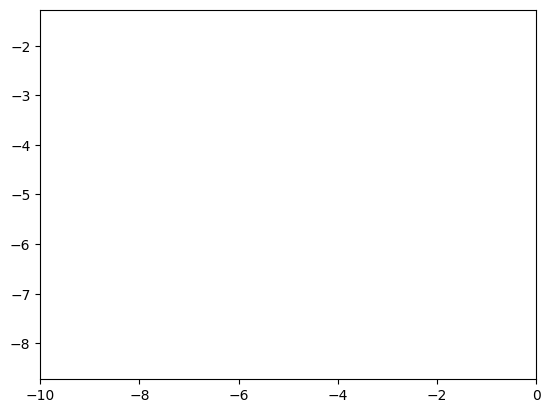

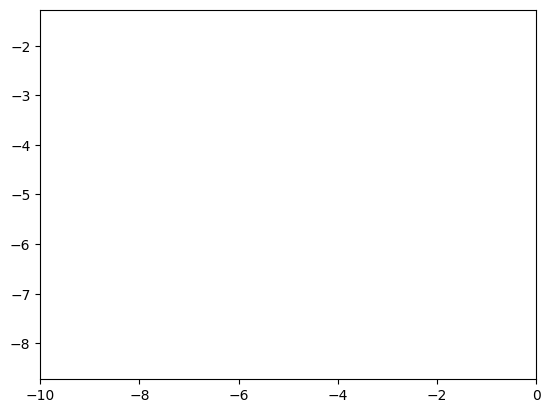

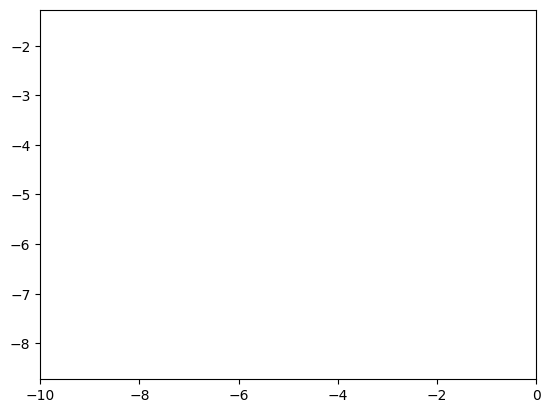

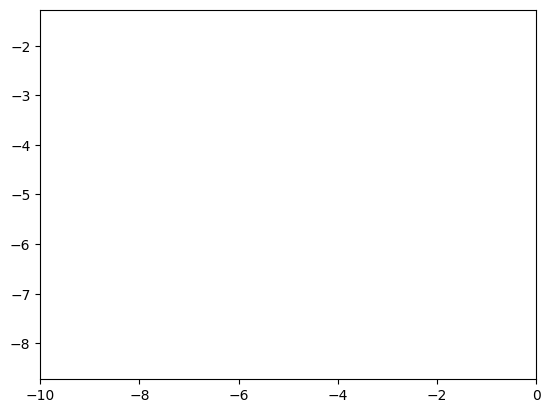

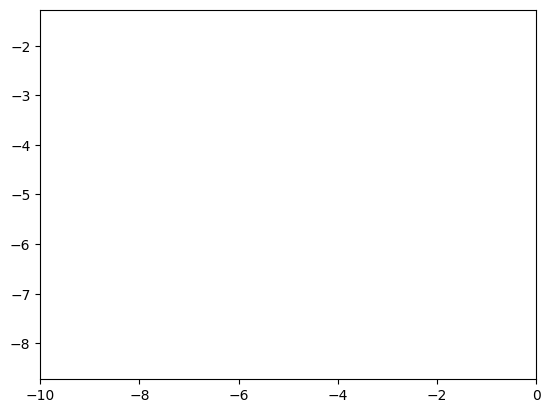

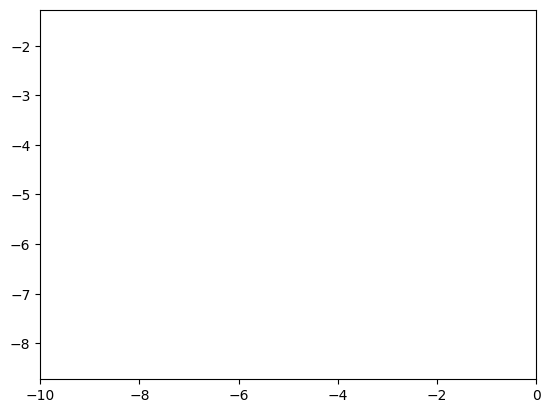

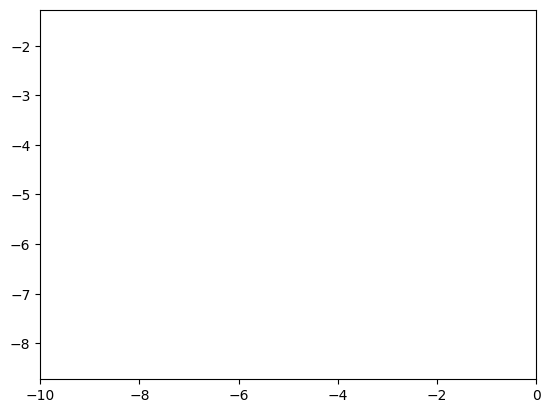

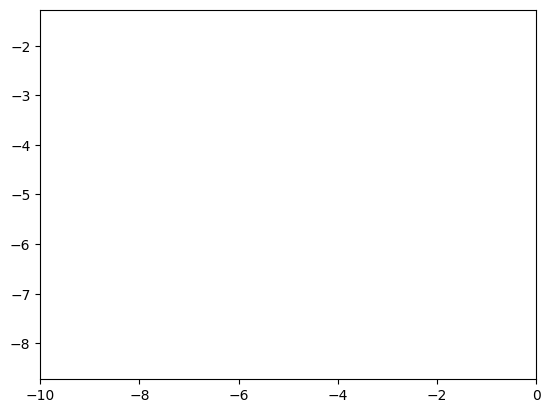

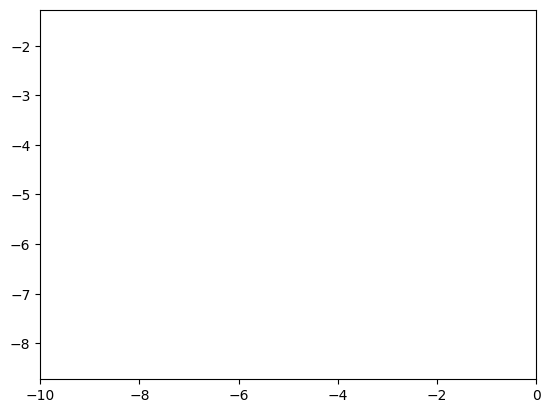

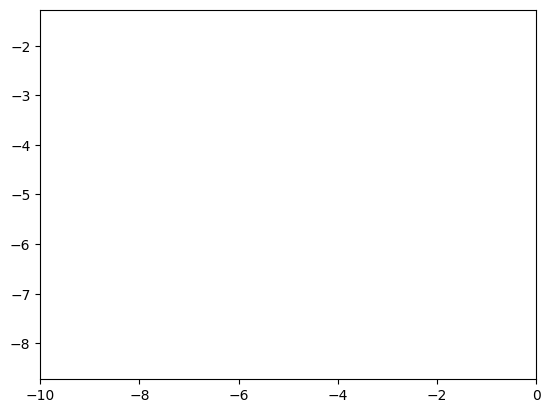

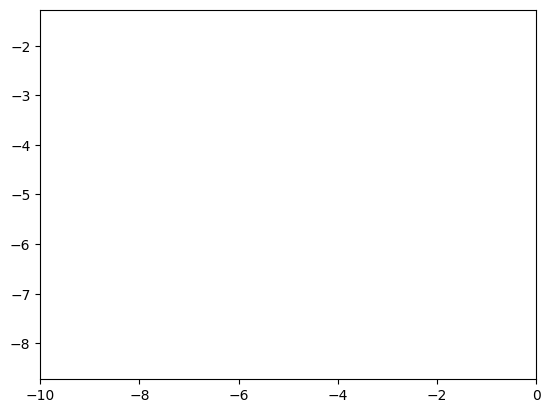

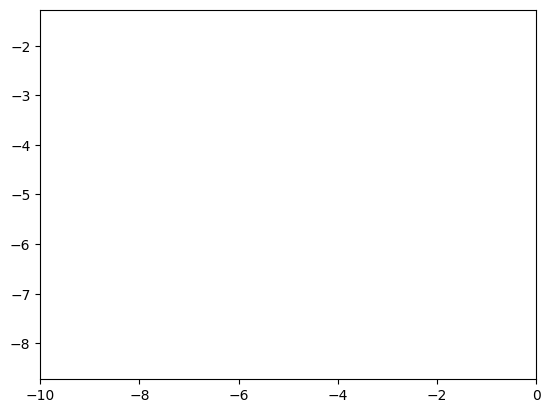

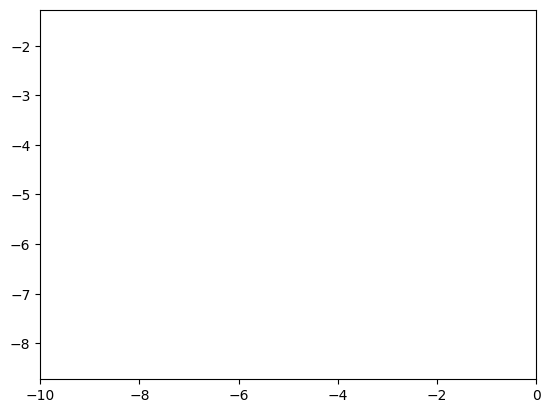

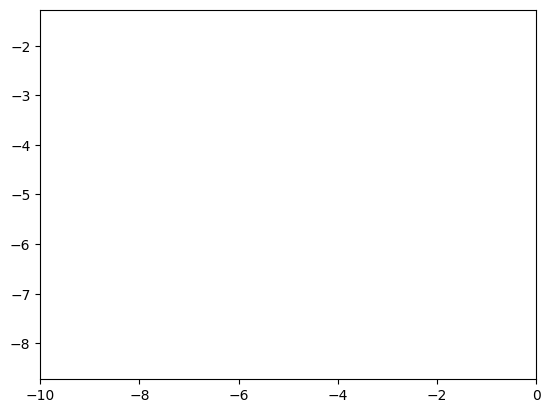

ValueError: operands could not be broadcast together with shapes (150,2) (135,2) (135,2) 

In [ ]:
# MNSV_S1_2.m


import numpy as np
import matplotlib.pyplot as plt

# Define the objective function ObjF_S1
def ObjF_S1(C):
    return np.sum((C + 5)**2 - 10 * np.cos(2 * np.pi * C)) + 20

# Define MNSV Parameters
N = 2                     # Number of variables
NS = 15                   # Number of samples
MAXIT = 30                # Maximum Number of iterations
OBJ_F = 'ObjF_S1'         # Name of objective function
R = np.array([[-10, 10], [-10, 10]])  # Bounds on decision variables

# Contour plot setup
xx = np.arange(-10, 10, 0.1)
yy = np.arange(-10, 10, 0.1)
P, Q = np.meshgrid(xx, yy)
F = (P + 5)**2 - 10 * np.cos(2 * np.pi * P) + (Q + 5)**2 - 10 * np.cos(2 * np.pi * Q) + 20

# Plot initial contour and point
plt.contour(xx, yy, F, 10)
plt.plot(-5, -5, 'kp')
plt.axis('equal')
plt.show()
plt.pause(0.5)

# Initialization
NP = int(NS * (NS + 3) / 2)
R1 = np.tile(R[0, :], (NP, 1))
R2 = np.tile(R[1, :], (NP, 1))
x = np.random.uniform(R1, R2)
f = np.apply_along_axis(ObjF_S1, 1, x)

# Main loop
Best = np.zeros(MAXIT)
for it in range(MAXIT):
    indices = np.argsort(f)
    x = x[indices[:NS], :]

    # Plot current iteration
    plt.clf()
    plt.contour(xx, yy, F, 10)
    plt.title('Iteration = ' + str(it))
    plt.plot(x[:, 0], x[:, 1], 'r*')
    plt.axis('equal')
    plt.axis([-10, 0, -10, 0])
    plt.show()
    plt.pause(0.5)

    a = (0.3) ** (it / MAXIT)
    z = a * np.var(x, axis=0)

    # Plot ellipses
    t = np.arange(0, 2 * np.pi, 0.01)
    for i in range(NS):
        x1 = x[i, 0] + np.sqrt(z[0]) * np.cos(t)
        y1 = x[i, 1] + np.sqrt(z[1]) * np.sin(t)
        plt.plot(x1, y1)
        plt.axis('equal')
        plt.axis([-10, 0, -10, 0])
        plt.pause(0.1)

    # Generate new samples
    for i in range(NS):
        x = np.vstack([x, np.random.multivariate_normal(x[i, :], np.diag(z), NS + 1 - i)])

    x = np.clip(x, R1, R2)
    f = np.apply_along_axis(ObjF_S1, 1, x)

    fb, j = np.min(f), np.argmin(f)
    xb = x[j, :]
    Best[it] = fb

    print("Iteration:", it + 1)
    print("xmin:", xb)
    print("fmin:", fb)
    print("----")

xmin, fmin = xb, fb
print('Final xmin:', xmin)
print('Final fmin:', fmin)
